# E-COMMERCE DATASET
This dataset is having data of customers who buys clothes online. The store offers in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import copy
import math
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv('/content/E_comm.csv')
print(df.head())

                           Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB
None


In [ ]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


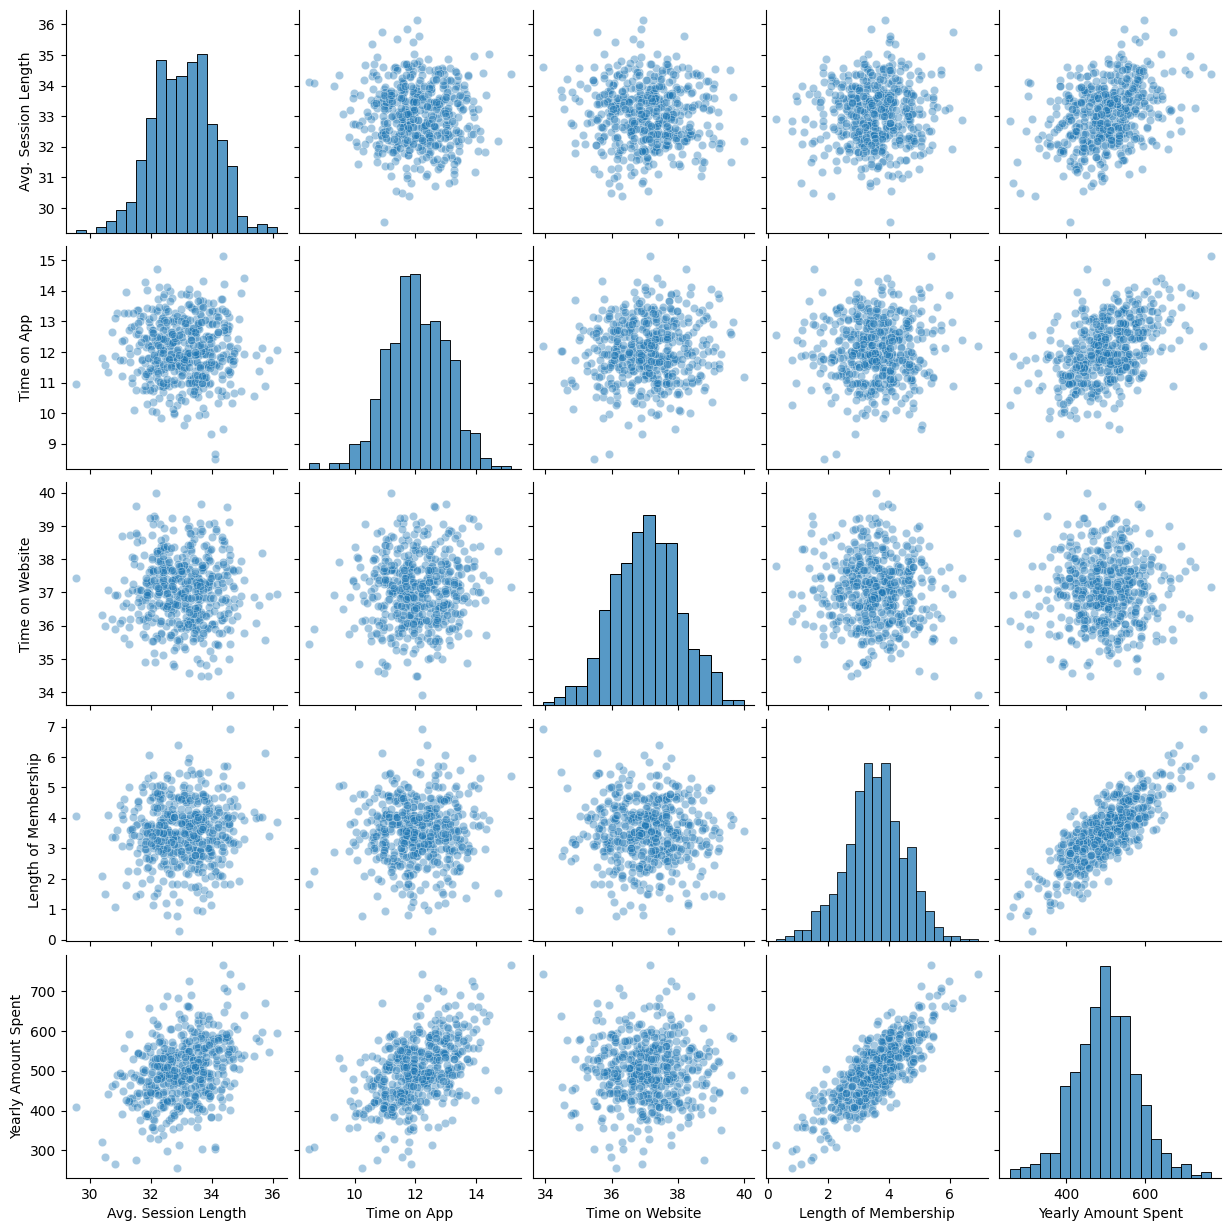

In [ ]:
sns.pairplot(df,kind= 'scatter',plot_kws= {'alpha':0.4})

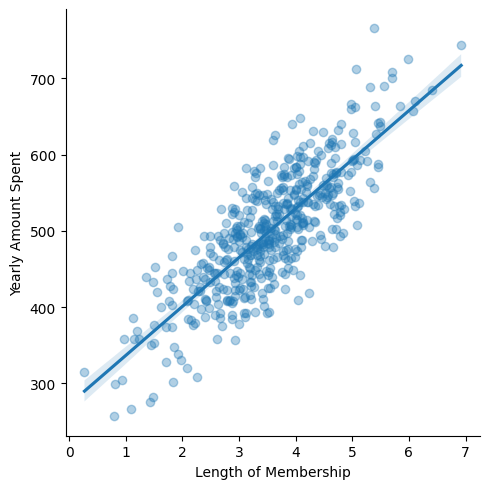

In [82]:
sns.lmplot(x='Length of Membership', y= 'Yearly Amount Spent', data= df, scatter_kws= {'alpha':0.35})

# Implementing Our Linear Regression Model

In [52]:
from sklearn.model_selection import train_test_split

In [76]:
X= df[['Time on App','Length of Membership','Avg. Session Length','Time on Website']]
y= df['Yearly Amount Spent']

In [77]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.25, random_state= 42)

In [78]:
# to compute mean error cost using given parameters and features
def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost = cost + (f_wb_i - y[i])**2
    cost = cost / (2 * m)
    return cost

In [56]:
# To compute the gradient for the given parameters which will be used in gradient descent
def compute_gradient(X, y, w, b):

    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        er = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + er * X[i, j]
        dj_db = dj_db + er
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw


In [57]:
def gradient_descent(X, y, w_in, b_in, compute_cost, compute_gradient, alpha, num_iters):

    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):

        dj_db,dj_dw = compute_gradient(X, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i<100000:
            J_history.append( compute_cost(X, y, w, b))

        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")

    return w, b, J_history

In [58]:
# Linear Regression Class
class LinearReg:

  w_final, b_final, J_hist= 0.,0.,[]

  def __init__(self):
    pass

  def fit(self, X, y):
    if isinstance(X, pd.DataFrame):
          X = X.values
    if isinstance(y, pd.Series):
          y = y.values
    m,n= X.shape
    initial_w= np.zeros(n)
    initial_b= 0.

    iterations = 15000
    alpha = 5.0e-4

    self.w_final, self.b_final, self.J_hist = gradient_descent(X, y, initial_w, initial_b,compute_cost, compute_gradient,
                                                    alpha, iterations)

  def predict(self, X):
    if isinstance(X, pd.DataFrame):
          X = X.values
    pred= []
    for i in range(len(X)):
      pred.append(np.dot(X[i],self.w_final)+self.b_final)
    return pred

In [79]:
# making an instance of our Linear Regression Model
lmm= LinearReg()
# fit the training data
lmm.fit(X_train,y_train)
# predict with test data
prediction = lmm.predict(X_test)

Iteration    0: Cost 15118.55   
Iteration 1500: Cost   813.59   
Iteration 3000: Cost   377.32   
Iteration 4500: Cost   289.69   
Iteration 6000: Cost   271.97   
Iteration 7500: Cost   268.30   
Iteration 9000: Cost   267.46   
Iteration 10500: Cost   267.18   
Iteration 12000: Cost   267.02   
Iteration 13500: Cost   266.89   


# Analysis of Our Model Predictions

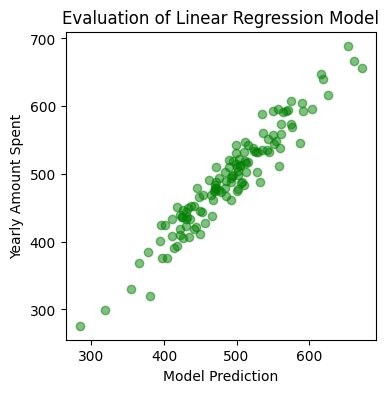

In [80]:
# plotting predictions vs actual target
plt.figure(figsize= (4,4))
plt.scatter(prediction,y_test, alpha= 0.5,c= 'g')
plt.xlabel('Model Prediction')
plt.ylabel('Yearly Amount Spent')
plt.title('Evaluation of Linear Regression Model')
plt.show()

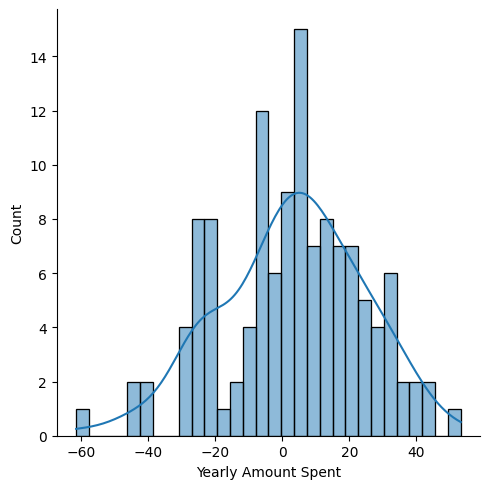

In [81]:
# residual, difference between target values and predictions
Residual= y_test- prediction
sns.displot(Residual, bins= 30,kde= True)

In [84]:
# Mean absolute error and Mean squared error of target values and Predictions
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('Mean absolute error: ', mean_absolute_error(y_test, prediction))
print('Mean squared error: ', mean_squared_error(y_test, prediction))

Mean absolute error:  17.077916973687643
Mean squared error:  451.59514107307757
